<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(0_4)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.4_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,20.591620,30.107830,-2.855450,57.844000,60.190348,-2.346348
1,0.0,1.0,28.251731,42.954660,-1.589056,79.617336,80.741419,-1.124083
2,0.0,2.0,24.687900,59.075635,2.939747,96.703282,93.154117,3.549165
3,0.0,3.0,58.889540,64.418518,-4.817859,128.490199,133.187357,-4.697159
4,0.0,4.0,72.001874,34.926060,3.138741,120.066674,117.171465,2.895209
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,56.387205,50.373812,-2.016354,114.744662,116.841081,-2.096419
119996,999.0,116.0,67.869422,90.883431,2.360019,171.112872,168.970869,2.142002
119997,999.0,117.0,76.314442,69.076059,-3.234232,152.156270,155.489229,-3.332960
119998,999.0,118.0,29.758099,32.142083,-1.537461,70.362721,71.984229,-1.621507


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    20.591620  30.107830 -2.855450   57.844000   60.190348 -2.346348
      1.0    28.251731  42.954660 -1.589056   79.617336   80.741419 -1.124083
      2.0    24.687900  59.075635  2.939747   96.703282   93.154117  3.549165
      3.0    58.889540  64.418518 -4.817859  128.490199  133.187357 -4.697159
      4.0    72.001874  34.926060  3.138741  120.066674  117.171465  2.895209
...                ...        ...       ...         ...         ...       ...
999.0 115.0  56.387205  50.373812 -2.016354  114.744662  116.841081 -2.096419
      116.0  67.869422  90.883431  2.360019  171.112872  168.970869  2.142002
      117.0  76.314442  69.076059 -3.234232  152.156270  155.489229 -3.332960
      118.0  29.758099  32.142083 -1.537461   70.362721   71.984229 -1.621507
      119.0  61.008418  57.824541  1.373265  130.206225  128.930672  1.275553

[120000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    20.591620  30.107830 -2.855450   57.844000   60.190348 -2.346348
      1.0    28.251731  42.954660 -1.589056   79.617336   80.741419 -1.124083
      2.0    24.687900  59.075635  2.939747   96.703282   93.154117  3.549165
      3.0    58.889540  64.418518 -4.817859  128.490199  133.187357 -4.697159
      4.0    72.001874  34.926060  3.138741  120.066674  117.171465  2.895209
...                ...        ...       ...         ...         ...       ...
999.0 115.0  56.387205  50.373812 -2.016354  114.744662  116.841081 -2.096419
      116.0  67.869422  90.883431  2.360019  171.112872  168.970869  2.142002
      117.0  76.314442  69.076059 -3.234232  152.156270  155.489229 -3.332960
      118.0  29.758099  32.142083 -1.537461   70.362721   71.984229 -1.621507
      119.0  61.008418  57.824541  1.373265  130.206225  128.930672  1.275553

[120000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,20.591620,30.107830,-2.855450,57.844000,60.190348,-2.346348
1,0.0,1.0,28.251731,42.954660,-1.589056,79.617336,80.741419,-1.124083
2,0.0,2.0,24.687900,59.075635,2.939747,96.703282,93.154117,3.549165
3,0.0,3.0,58.889540,64.418518,-4.817859,128.490199,133.187357,-4.697159
4,0.0,4.0,72.001874,34.926060,3.138741,120.066674,117.171465,2.895209
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,56.387205,50.373812,-2.016354,114.744662,116.841081,-2.096419
119996,999.0,116.0,67.869422,90.883431,2.360019,171.112872,168.970869,2.142002
119997,999.0,117.0,76.314442,69.076059,-3.234232,152.156270,155.489229,-3.332960
119998,999.0,118.0,29.758099,32.142083,-1.537461,70.362721,71.984229,-1.621507


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    20.591620  30.107830 -2.855450   57.844000   60.190348 -2.346348
      1.0    28.251731  42.954660 -1.589056   79.617336   80.741419 -1.124083
      2.0    24.687900  59.075635  2.939747   96.703282   93.154117  3.549165
      3.0    58.889540  64.418518 -4.817859  128.490199  133.187357 -4.697159
      4.0    72.001874  34.926060  3.138741  120.066674  117.171465  2.895209
...                ...        ...       ...         ...         ...       ...
999.0 115.0  56.387205  50.373812 -2.016354  114.744662  116.841081 -2.096419
      116.0  67.869422  90.883431  2.360019  171.112872  168.970869  2.142002
      117.0  76.314442  69.076059 -3.234232  152.156270  155.489229 -3.332960
      118.0  29.758099  32.142083 -1.537461   70.362721   71.984229 -1.621507
      119.0  61.008418  57.824541  1.373265  130.206225  128.930672  1.275553

[120000 rows x 6 columns]

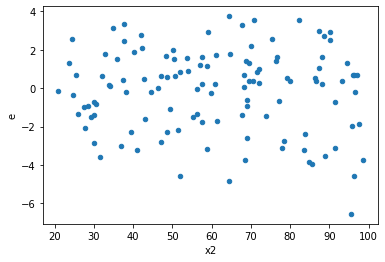

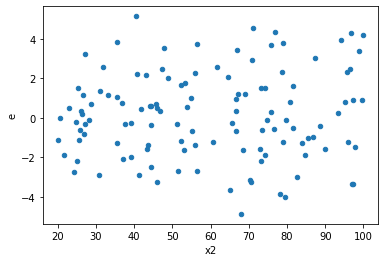

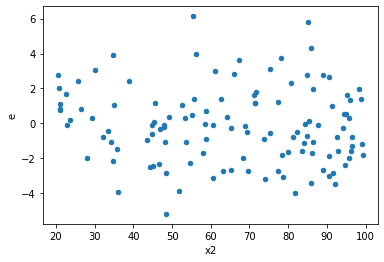

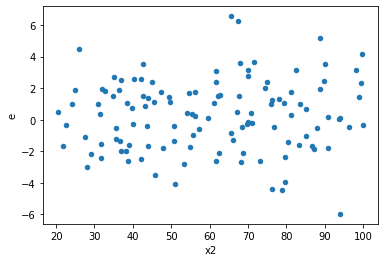

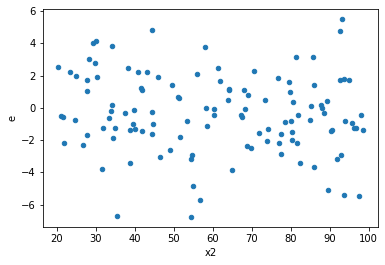

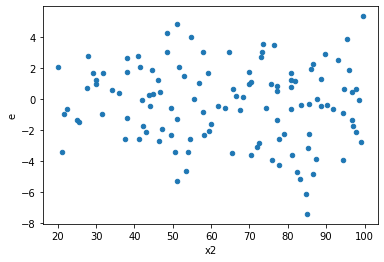

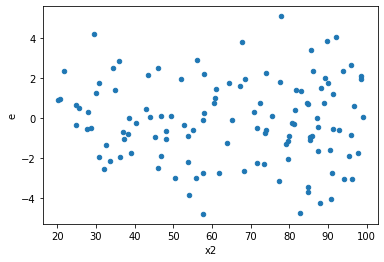

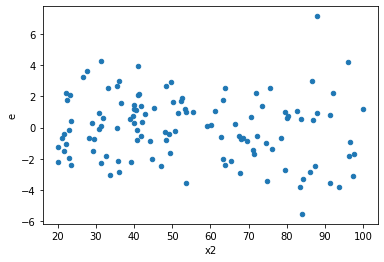

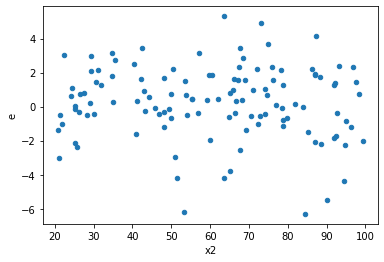

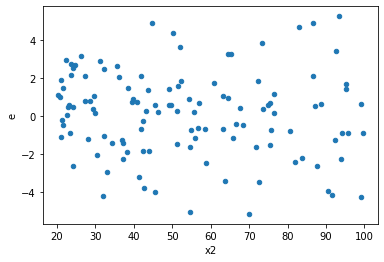

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,57.0,59.0,252.99870327236926,329.0123514835182,4.438573741620513,5.576480533618953,1.2563676663357612,0.3863074759929521,0.8068462620035239,0.19315373799647606,Reject001=1 : Homoscedasticity
4.0,46.0,70.0,219.18701279544075,446.18529028588074,4.764935060770451,6.374075575512582,1.3377046054604458,0.26838029252065443,0.8658098537396728,0.13419014626032721,Reject001=1 : Homoscedasticity
5.0,57.0,59.0,296.2039364635684,425.8725009187638,5.196560288834534,7.218177981673963,1.3890299699174338,0.21289968754444488,0.8935501562277776,0.10644984377222244,Reject001=1 : Homoscedasticity
9.0,63.0,53.0,207.74722045967815,284.5233751255529,3.2975749279313993,5.3683655684066585,1.6279737946013213,0.07001526734084451,0.9649923663295777,0.035007633670422256,Reject001=1 : Homoscedasticity
10.0,60.0,56.0,234.65916189327143,358.4611060934159,3.9109860315545237,6.401091180239569,1.636694973746886,0.06439606543562104,0.9678019672821895,0.03219803271781052,Reject001=1 : Homoscedasticity
12.0,57.0,59.0,271.2964979498755,386.02674909857177,4.75958768333115,6.542826255907996,1.374662405910083,0.22766432246264778,0.8861678387686761,0.11383216123132389,Reject001=1 : Homoscedasticity
14.0,48.0,68.0,207.6469907384304,396.3146340935806,4.3259789737173,5.828156383729127,1.347245656795463,0.2559431849342335,0.8720284075328832,0.12797159246711676,Reject001=1 : Homoscedasticity
17.0,47.0,69.0,241.93906195171252,354.754401458617,5.147639615993883,5.141368137081406,0.998781678714844,0.9900945892314845,0.5049527053842577,0.49504729461574226,Reject001=1 : Homoscedasticity
22.0,68.0,48.0,369.94434832179223,356.4398299683916,5.4403580635557685,7.425829791008159,1.3649523991357848,0.25676719169278694,0.8716164041536065,0.12838359584639347,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,60.0,56.0,256.3621323633317,237.39525855353565,4.272702206055528,4.239201045598851,0.9921592568728059,0.9737887133884396,Reject001=1 : Homoscedasticity
1.0,59.0,57.0,275.08490075722625,245.56382522736024,4.662455945037733,4.30813728469053,0.9240060035903813,0.7632878072896703,Reject001=1 : Homoscedasticity
2.0,59.0,57.0,281.00905521199957,262.159417538692,4.762865342576264,4.599288026994597,0.9656556917283774,0.8933955414299763,Reject001=1 : Homoscedasticity
3.0,57.0,59.0,252.99870327236926,329.0123514835182,4.438573741620513,5.576480533618953,1.2563676663357612,0.3863074759929521,Reject001=1 : Homoscedasticity
4.0,46.0,70.0,219.18701279544075,446.18529028588074,4.764935060770451,6.374075575512582,1.3377046054604458,0.26838029252065443,Reject001=1 : Homoscedasticity
5.0,57.0,59.0,296.2039364635684,425.8725009187638,5.196560288834534,7.218177981673963,1.3890299699174338,0.21289968754444488,Reject001=1 : Homoscedasticity
6.0,67.0,49.0,350.394977071784,140.8159650184903,5.229775777190806,2.8737952044589856,0.5495063893547374,0.022931270769022027,Reject001=1 : Homoscedasticity
7.0,66.0,50.0,315.2580123400665,156.17167604924526,4.776636550607068,3.1234335209849053,0.6538980908204005,0.10585649857831807,Reject001=1 : Homoscedasticity
8.0,55.0,61.0,260.52045496944885,244.88092906530795,4.73673554489907,4.014441460087015,0.847512262830488,0.5348142027844264,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      960
Reject001=0 : Heteroscedasticity     40
Name: Result_test, dtype: int64